# Handwritten Character Recognition - Model Optimization and Training

This notebook focuses on improving baseline performance by using more powerful classification models and applying optimization techniques.

The objective is to identify a high-performing model suitable for deployment.

In [1]:
import numpy as np
import joblib
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

We load the preprocessed flattened dataset generated earlier.

In [2]:
X_train, X_test, y_train, y_test = joblib.load("../datasets/processed_emnist_flat.pkl")

print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)


Training shape: (105280, 784)
Testing shape: (26320, 784)


EMNIST images have 784 features per sample.

We apply Principal Component Analysis to:
- reduce dimensionality
- remove noise and redundancy
- speed up training
- potentially improve generalization

In [3]:
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print("Original shape:", X_train.shape)
print("Reduced shape:", X_train_pca.shape)

Original shape: (105280, 784)
Reduced shape: (105280, 113)


Support Vector Machines are powerful classifiers for high-dimensional image data.

We train an SVM on PCA-reduced features.

In [4]:
svm_model = SVC(kernel="rbf", C=10, gamma="scale")
svm_model.fit(X_train_pca, y_train)

svm_preds = svm_model.predict(X_test_pca)
svm_acc = accuracy_score(y_test, svm_preds)

print("SVM Accuracy:", svm_acc)

SVM Accuracy: 0.856306990881459


Random Forests provide a strong nonlinear baseline and handle feature interactions effectively.

In [5]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf_model.fit(X_train_pca, y_train)

rf_preds = rf_model.predict(X_test_pca)
rf_acc = accuracy_score(y_test, rf_preds)

print("Random Forest Accuracy:", rf_acc)

Random Forest Accuracy: 0.7738601823708207


We compare optimized models to identify the strongest performer.

In [6]:
print("Optimized Model Comparison")
print("SVM Accuracy:", svm_acc)
print("Random Forest Accuracy:", rf_acc)

Optimized Model Comparison
SVM Accuracy: 0.856306990881459
Random Forest Accuracy: 0.7738601823708207


We visualize the confusion matrix of the best optimized model.

<Figure size 1000x1000 with 0 Axes>

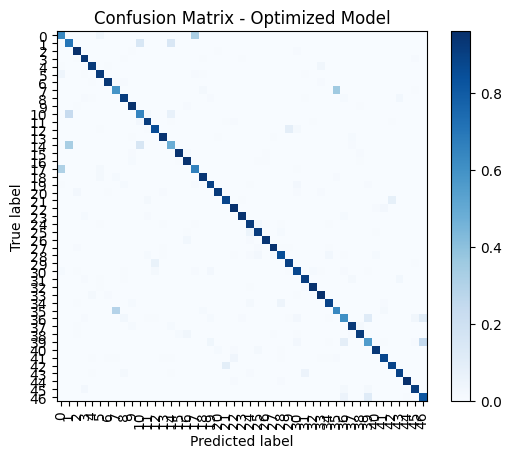

In [9]:
best_model = svm_model if svm_acc > rf_acc else rf_model
best_preds = best_model.predict(X_test_pca)

cm = confusion_matrix(y_test, best_preds, normalize='true')

plt.figure(figsize=(10,10))
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap="Blues", xticks_rotation=90, include_values=False, colorbar=True)
plt.title("Confusion Matrix - Optimized Model")
plt.show()

The selected optimized model and PCA transformer are saved for deployment.

In [8]:
joblib.dump(best_model, "../models/optimized_model.pkl")
joblib.dump(pca, "../models/pca_transformer.pkl")

print("Optimized model and PCA transformer saved.")

Optimized model and PCA transformer saved.


Conclusions:

- Dimensionality reduction significantly reduces computational complexity.
- Optimized models outperform baseline classifiers.
- Support Vector Machines provide strong performance on handwritten character data.
- The selected model demonstrates improved generalization and class separation.

The optimized model is now suitable for final evaluation and deployment.